<h1 align="center"> Credit card risk analysis</h1>

<h2 align="center"> Bruno Ortega Goes, M.Sc.</h2>


### Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

### Goal

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task. 

### Content & Explanation

There're two tables could be merged by ID:

application_record.csv 		

* ID: Client number 	
* CODE_GENDER: Gender 	
* FLAG_OWN_CAR: Is there a car 	
* FLAG_OWN_REALTY: Is there a property 	
* CNT_CHILDREN: Number of children 	
* AMT_INCOME_TOTAL: Annual income 	
* NAME_INCOME_TYPE: Income category 	
* NAME_EDUCATION_TYPE: Education level 	
* NAME_FAMILY_STATUS: Marital status 	
* NAME_HOUSING_TYPE: Way of living 	
* DAYS_BIRTH: Birthday. Count backwards from current day (0), -1 means yesterday
* DAYS_EMPLOYED: Start date of employment. Count backwards from current day(0). If positive, it means the person currently unemployed.
* FLAG_MOBIL: Is there a mobile phone.	
* FLAG_WORK_PHONE: Is there a work phone 	
* FLAG_PHONE: Is there a phone 	
* FLAG_EMAIL: Is there an email 	
* OCCUPATION_TYPE: Occupation 	
* CNT_FAM_MEMBERS: Family size 

credit_record.csv 		
* ID: Client number 	
* MONTHS_BALANCE: Record month. The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
* **STATUS**: Status. 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month * X: No loan for the month

### References
The dataset used in this project can be found in: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction (dirty version).

There is also a clean version of this data that can be found in: https://www.kaggle.com/datasets/samuelcortinhas/credit-card-classification-clean-data

Interesting related competition: https://www.kaggle.com/competitions/home-credit-default-risk/data

## Preamble

In [1]:
# Basic working tools
import numpy as np
import pandas as pd

# Plot tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Big fonts
sns.set(font_scale = 1.5)

# Plots location
import os
nb_directory=os. getcwd() # Find the directory of my notebook
plots_path = nb_directory+'/Plots/' # Save my plots in a dedicated folder

# Some styling for the plots
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['text.usetex'] = True
# To index plots smartly and automatically
import string
alphabet = list(string.ascii_lowercase)

font_size =  22 #default font size for my plots

def save_plot(name_extension):
    '''
    Parameters
    ----------
    name_extension : STRING
        You must provide the name of you plot followed by the type of document in quote marks.
        
        Ex.: 'Fig1.pdf'

    Returns
    -------
    None. Only saves the image.

    '''

    plt.savefig(plots_path+name_extension, bbox_inches = 'tight')

## I.Exploratory analysis

In this section I will make some preliminary analysis, I want to understand my dataset. To do so I focus on the following questions:

1) What are the features? How I use it to construct my target, i.e., to know if the client is a 'good' or 'bad' client?
2) Are there missing data? If so which ones?
    * How to treat them? Inputation? Remove?
3) Are there features that require pre-processing?

In [2]:
df_application = pd.read_csv('/Users/brunogoes/Dropbox/DataSets/RiskAnalysis/application_record.csv')
df_credit_record = pd.read_csv('/Users/brunogoes/Dropbox/DataSets/RiskAnalysis/credit_record.csv')

In [3]:
df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df_credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


* We need to join both datasets using the client ID, are there any missing IDs?

In [5]:
np.sum(df_application['ID'].isnull())

0

In [6]:
np.sum(df_credit_record['ID'].isnull())

0

#### Are there repeated IDs in the application dataset?

In [7]:
sum(df_application['ID'].duplicated())

47

* There are 47 repeated IDs, do they refer to the same person?

In [8]:
df_application[df_application['ID'].isin(df_application['ID'][df_application['ID'].duplicated()])].sort_values('ID')





,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


* The repeated IDs refer to different profiles of clients, they have different genders most of the time. I imagine they are couples. 
* For the moment, since it is just 47 repeated entries, I choose to get rid of the repeated IDs before joining the datasets.

In [9]:
df_application = df_application.drop_duplicates(subset = 'ID', keep = False, inplace = False)

* This makes us free of repeated entries:

In [10]:
sum(df_application['ID'].duplicated())

0

* There are no missing IDs. In the next line I merge both datasets:

In [11]:
# Merge the fatasets on the 'ID' column
df = pd.merge(df_application, df_credit_record, on='ID')

In [12]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


* Are there missing values?

In [13]:
np.sum(df.isnull()).T

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

* Only the OCCUPATION_TYPE presents missing values.

In [14]:
df['OCCUPATION_TYPE'].count()/df['ID'].count()

0.6913419440283395

* Indeed, we do not have information about the occupation of almost 70% of the data set.
* This feature is potentially excludable since even imputation techniques would not lead to accurate predictions of the occupation of the clients.

In [15]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


* Features that need pre-processing: DAYS_BIRTH, DAYS_EMPLOYED

## II.Data treatment and analysis

In this section I address the following:

1) Drop useless information.
2) I pre-process the needed features: DAYS_BIRTH, DAYS_EMPLOYED
3) I create the features: 
    * AMT_INCOME_PER_PERSON that is the ratio between the total income, AMT_INCOME_TOTAL, and the total family members, CNT_FAM_MEMBERS, of each client, and
    * AMT_INCOME_PER_CHILD that is the ratio between the total income, AMT_INCOME_TOTAL, and the total of children, CNT_CHILDREN. This is set to 0 if the client has no children.
4) Set a classification of potentially 'good' and 'bad' client.
5) Distributions of the features?
    * Are there more man or women asking for credit?
    * More maried or single?
    * Family members?
    * Housing type?
6) Are there outliers? 
    * Like real outliers would be someone with an age of 800 years.

### 1) Dropping informationless features

* Dropping the OCCUPATION column that has 70% of missing values

In [16]:
df = df.drop('OCCUPATION_TYPE', axis = 1)

In [17]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C


In [18]:
np.sum(df.isnull()).T

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

* The ID was necessary to join the datasets but for classification purposes it is meaningless, I'll delete it as well.

In [19]:
df = df.drop('ID', axis = 1)

In [20]:
np.sum(df.isnull()).T

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

* We are left with the following columns

* Finally, I'll drop the 'FLAGS' features based on my instinct that having or not a cellphone is not correlated with the client being a good or bad credit holder.

In [21]:
df = df.drop(['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'], axis = 1)

In [22]:
df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [23]:
np.sum(df.isnull()).T

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

### 2) Adjusting age and days employed

* I transform the 'DAYS_BIRTH' into 'AGE' by diving this values by 365.25 (.25 accounts for the leap years)

In [24]:
#the - sign is to take into account the backwards count
df['AGE'] = -round(df['DAYS_BIRTH']/365.25,0) 
df = df.drop('DAYS_BIRTH', axis = 1)

df['YEARS_EMPLOYED'] = -round(df['DAYS_EMPLOYED']/365.25,0)
df = df.drop('DAYS_EMPLOYED', axis = 1)

### 3) Creating new features

In [25]:
df['AMT_INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL']/df['CNT_FAM_MEMBERS']



In [26]:
def amt_per_child(dataframe):
    if dataframe['CNT_CHILDREN'] == 0:
        return 0
    else:
        return dataframe['AMT_INCOME_TOTAL']/dataframe['CNT_CHILDREN']
    

In [27]:
df['AMT_INCOME_PER_CHILD'] = df.apply(amt_per_child, axis = 1)

In [28]:
np.sum(df.isnull()).T

CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
CNT_FAM_MEMBERS          0
MONTHS_BALANCE           0
STATUS                   0
AGE                      0
YEARS_EMPLOYED           0
AMT_INCOME_PER_PERSON    0
AMT_INCOME_PER_CHILD     0
dtype: int64

* The dataset up to now has the following characteristics:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CODE_GENDER            777715 non-null  object 
 1   FLAG_OWN_CAR           777715 non-null  object 
 2   FLAG_OWN_REALTY        777715 non-null  object 
 3   CNT_CHILDREN           777715 non-null  int64  
 4   AMT_INCOME_TOTAL       777715 non-null  float64
 5   NAME_INCOME_TYPE       777715 non-null  object 
 6   NAME_EDUCATION_TYPE    777715 non-null  object 
 7   NAME_FAMILY_STATUS     777715 non-null  object 
 8   NAME_HOUSING_TYPE      777715 non-null  object 
 9   CNT_FAM_MEMBERS        777715 non-null  float64
 10  MONTHS_BALANCE         777715 non-null  int64  
 11  STATUS                 777715 non-null  object 
 12  AGE                    777715 non-null  float64
 13  YEARS_EMPLOYED         777715 non-null  float64
 14  AMT_INCOME_PER_PERSON  777715 non-nu

### 4) The good, the bad (and the ugly) client

* The data provides the credit record (STATUS), but not the decision on whether we should or we should not approve a credit card for a client. I have to impose one (or several) criterium to classify a good or bad client.
* Let's check the STATUS available

In [30]:
status = df['STATUS'].unique()
print(len(status))
status

8


array(['C', '1', '0', 'X', '5', '4', '3', '2'], dtype=object)

* We have 8 status, according to the description of the dataset:
    * 0: 1-29 days past due 
    * 1: 30-59 days past due 
    * 2: 60-89 days overdue 
    * 3: 90-119 days overdue 
    * 4: 120-149 days overdue 
    * 5: Overdue or bad debts, write-offs for more than 150 days 
    * C: paid off that month 
    * X: No loan for the month

* As a first approach I'll consider **bad clients** everyone who takes more that 60 days to pay their debts, i.e., the categories 1-5. These are being classified as 1.
* **Good clients** are categories the ones that paid their debts this month C and category 1. These are being classified as 0.
* X are clients that do not have loans, hence they provide no information and they will be be **droped** from the working dataset and saved in a second dataset that I'll use to check my predictions. C paid off their debts but we don't know after how long, so they also do not provide useful information. These will receive the class -1.
* Summary:
    * Good: 0
    * Bad : 1
    * Ugly: -1
* The following function classifies the clients:

In [31]:
def client_classifier(df):
    # Good payer
    if (df['STATUS'] == '0') or (df['STATUS'] == 'C'): 
        return 0
    #Bad payer
    elif (df['STATUS'] == '1') or (df['STATUS'] == '2') or (df['STATUS'] == '3') or (df['STATUS'] == '4') or (df['STATUS'] == '5'):
        return 1
    # No credit information
    else:
        return -1 

In [32]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE,YEARS_EMPLOYED,AMT_INCOME_PER_PERSON,AMT_INCOME_PER_CHILD
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,0,C,33.0,12.0,213750.0,0.0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,-1,C,33.0,12.0,213750.0,0.0
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,-2,C,33.0,12.0,213750.0,0.0
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,-3,C,33.0,12.0,213750.0,0.0
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,-4,C,33.0,12.0,213750.0,0.0


* Let's make the months_balance positive as well.

In [33]:
df["MONTHS_BALANCE"] = -df["MONTHS_BALANCE"]

In [34]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE,YEARS_EMPLOYED,AMT_INCOME_PER_PERSON,AMT_INCOME_PER_CHILD
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,0,C,33.0,12.0,213750.0,0.0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,1,C,33.0,12.0,213750.0,0.0
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,2,C,33.0,12.0,213750.0,0.0
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,3,C,33.0,12.0,213750.0,0.0
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,4,C,33.0,12.0,213750.0,0.0


* Classifying the clients:

In [35]:
df['CLIENT_CLASSIFICATION'] = df.apply(client_classifier, axis = 1)

In [36]:
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE,YEARS_EMPLOYED,AMT_INCOME_PER_PERSON,AMT_INCOME_PER_CHILD,CLIENT_CLASSIFICATION
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,0,C,33.0,12.0,213750.0,0.0,0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,1,C,33.0,12.0,213750.0,0.0,0
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,2,C,33.0,12.0,213750.0,0.0,0
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,3,C,33.0,12.0,213750.0,0.0,0
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,4,C,33.0,12.0,213750.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.0,9,0,25.0,3.0,112500.0,0.0,0
777711,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.0,10,2,25.0,3.0,112500.0,0.0,1
777712,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.0,11,1,25.0,3.0,112500.0,0.0,1
777713,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.0,12,0,25.0,3.0,112500.0,0.0,0


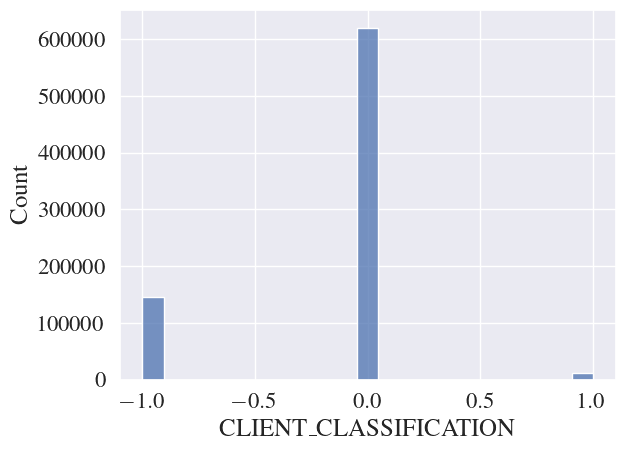

In [37]:
client_class = df['CLIENT_CLASSIFICATION']

sns.histplot(client_class)
plt.show()

### Creating Two data sets: "clean" with clients that have credit info and "indeterminate" with clients without credit history.

In [38]:
df_clean = df[df['CLIENT_CLASSIFICATION'] != -1]
df_indeterminate = df[df['CLIENT_CLASSIFICATION'] == -1]

In [39]:
df_indeterminate

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE,YEARS_EMPLOYED,AMT_INCOME_PER_PERSON,AMT_INCOME_PER_CHILD,CLIENT_CLASSIFICATION
15,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,15,X,33.0,12.0,213750.0,0.0,-1
30,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2.0,14,X,33.0,12.0,213750.0,0.0,-1
38,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,2.0,7,X,59.0,3.0,56250.0,0.0,-1
41,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,2.0,10,X,59.0,3.0,56250.0,0.0,-1
43,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,2.0,12,X,59.0,3.0,56250.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777629,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,2.0,7,X,47.0,7.0,157500.0,0.0,-1
777630,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,2.0,8,X,47.0,7.0,157500.0,0.0,-1
777631,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,2.0,9,X,47.0,7.0,157500.0,0.0,-1
777632,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,2.0,10,X,47.0,7.0,157500.0,0.0,-1


### 5) Features distributions plots on clean data set

In [40]:
len(df_clean.columns)

17

In [41]:
client_feature = dict()
for i in df_clean.columns:
    client_feature[i] = df_clean[i]

#### General view of the distribution of the features

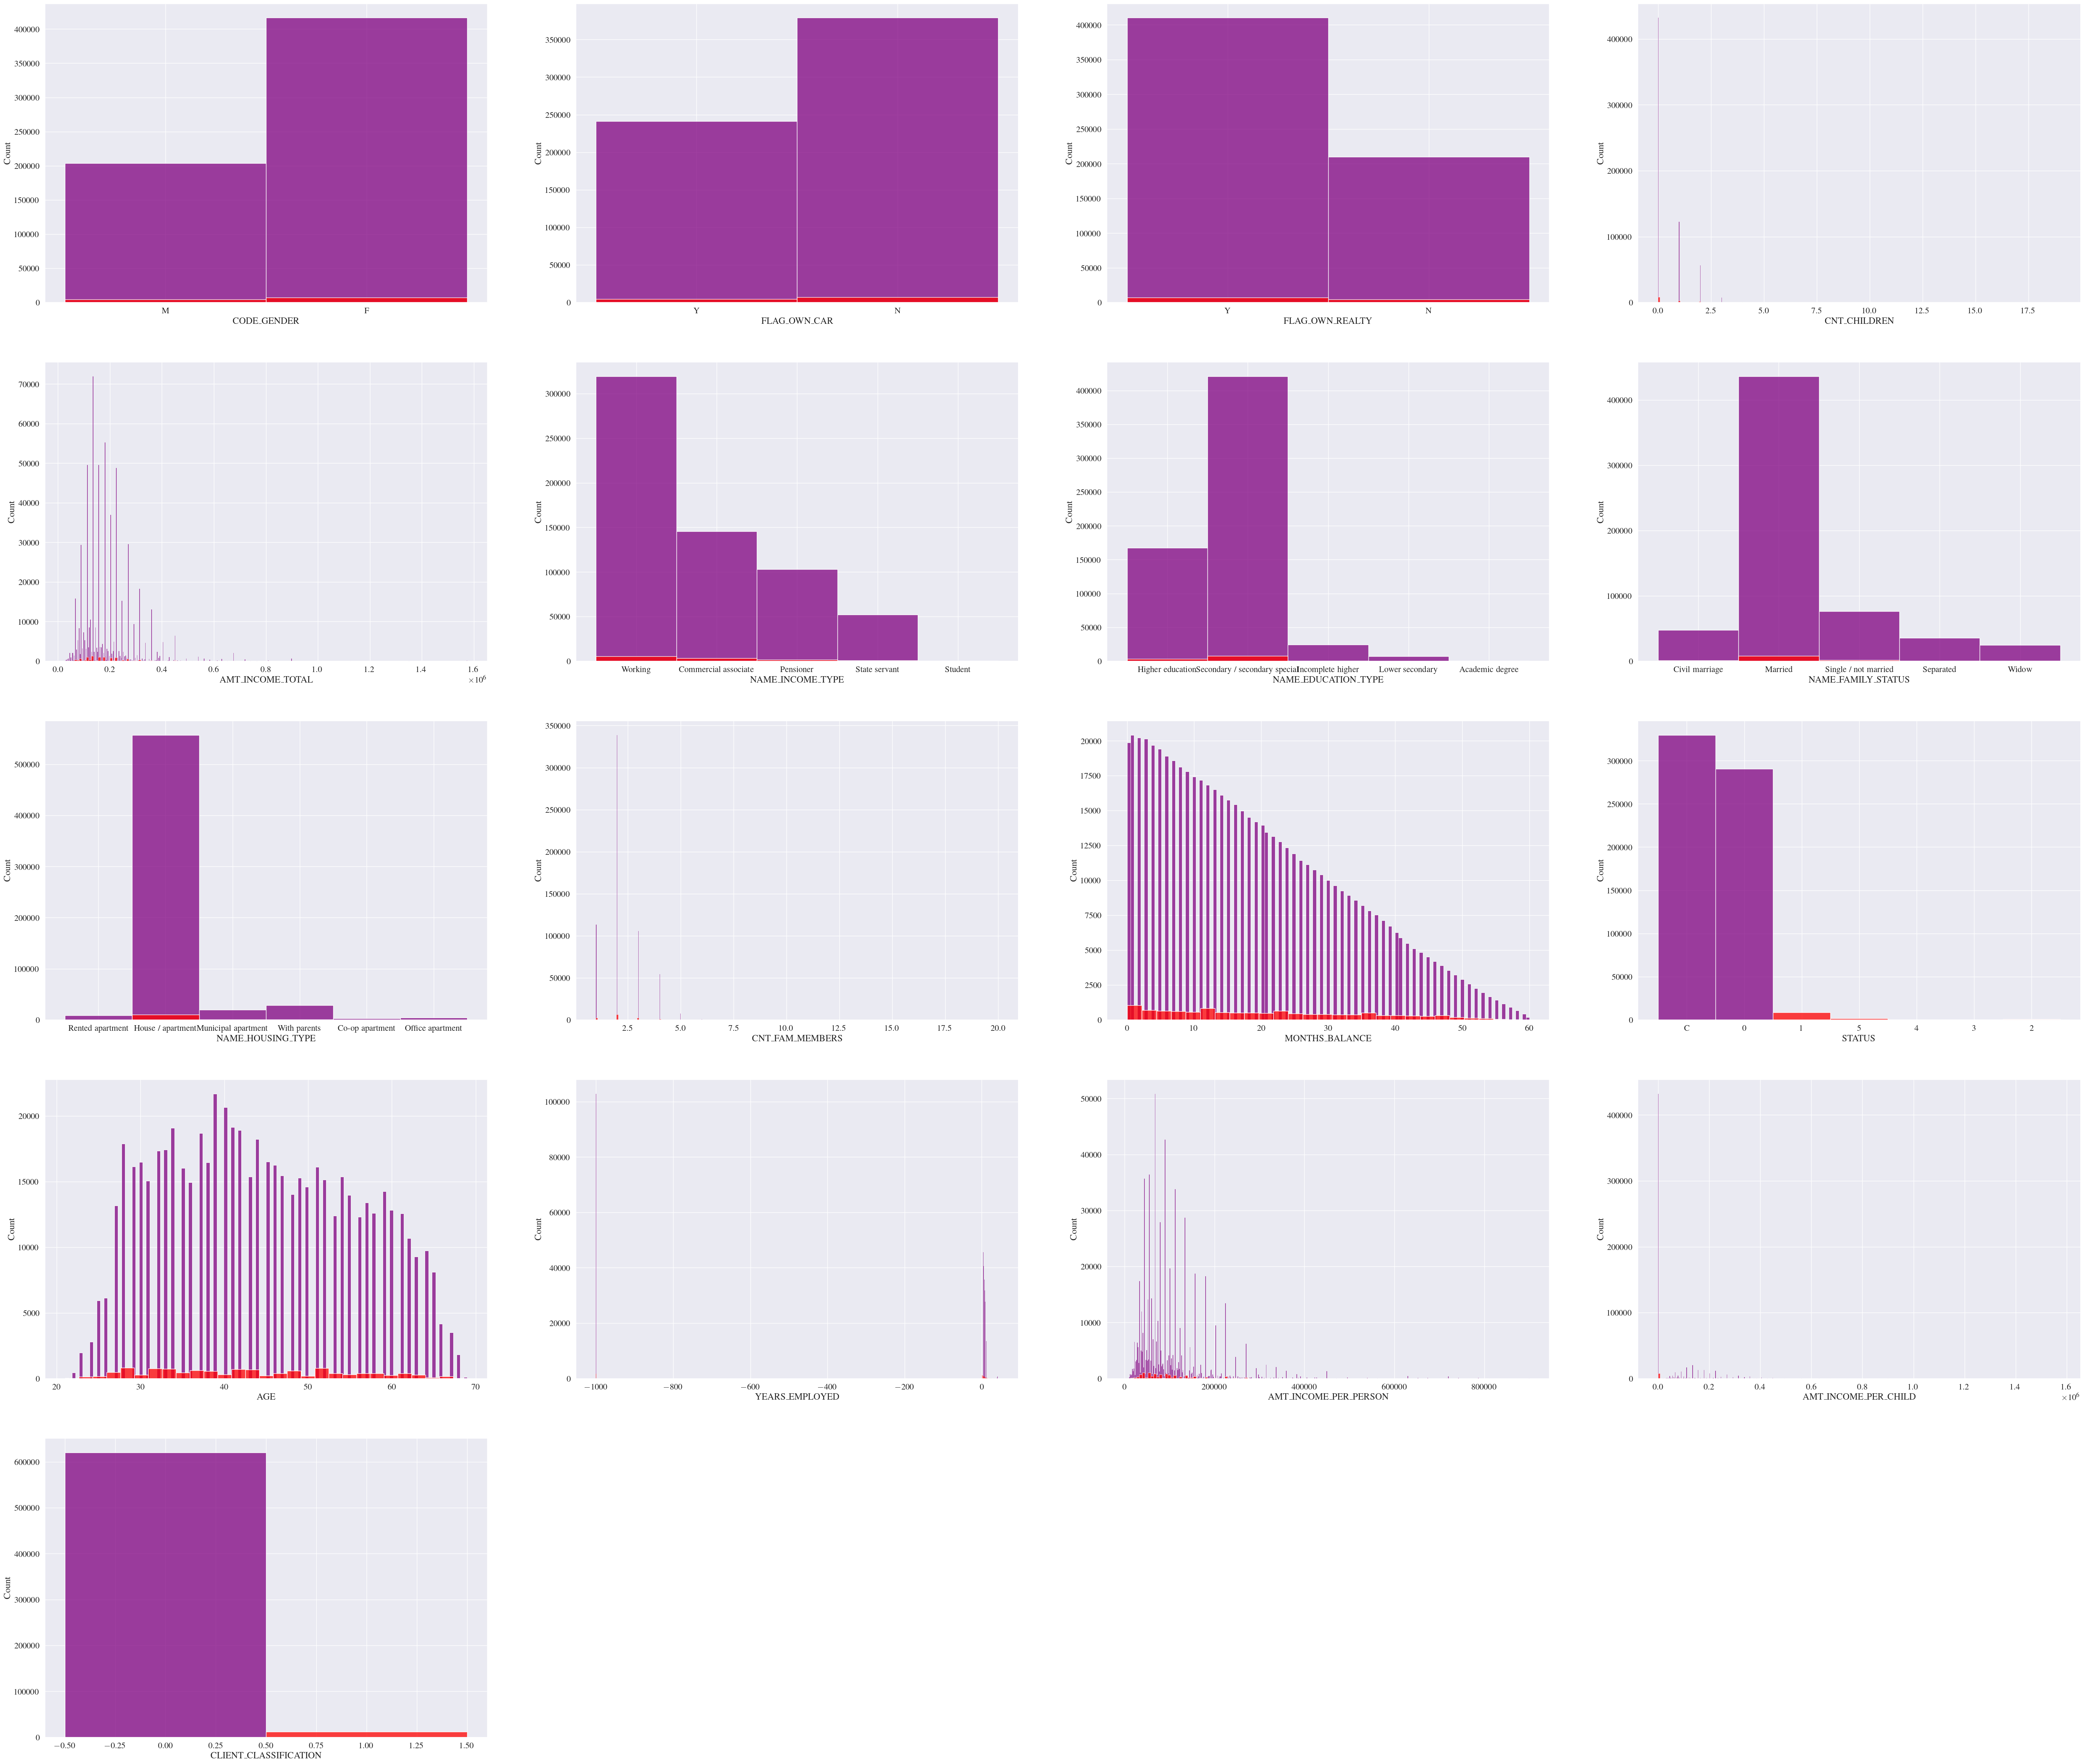

In [42]:
good_clients = df.CLIENT_CLASSIFICATION == 0
bad_clients = df.CLIENT_CLASSIFICATION == 1

# Set the number of rows and columns for the subplots
num_rows = 5
num_cols = 4

plt.figure(figsize = (70,60))

for n, col in enumerate(df_clean.columns.values):
    plt.subplot(num_rows,num_cols, n+1)
    sns.histplot(df_clean[col][good_clients], color='purple')
    sns.histplot(df_clean[col][bad_clients], color='red')
    #plt.title(col)

plt.show()

In [53]:
print('Good payer corresponds to', round(df['CLIENT_CLASSIFICATION'].value_counts(normalize=True)[0]*100,3),'% of the data set.  While the bad payers correspond to', round(df['CLIENT_CLASSIFICATION'].value_counts(normalize=True)[1]*100,3),'% of the data set. The clients without credit history correpond to' , round(df['CLIENT_CLASSIFICATION'].value_counts(normalize=True)[-1]*100,3),'% of the dataset')


Good payer corresponds to 79.745 % of the data set.  While the bad payers correspond to 1.488 % of the data set. The clients without credit history correpond to 18.767 % of the dataset


* Same thing only with bad clients

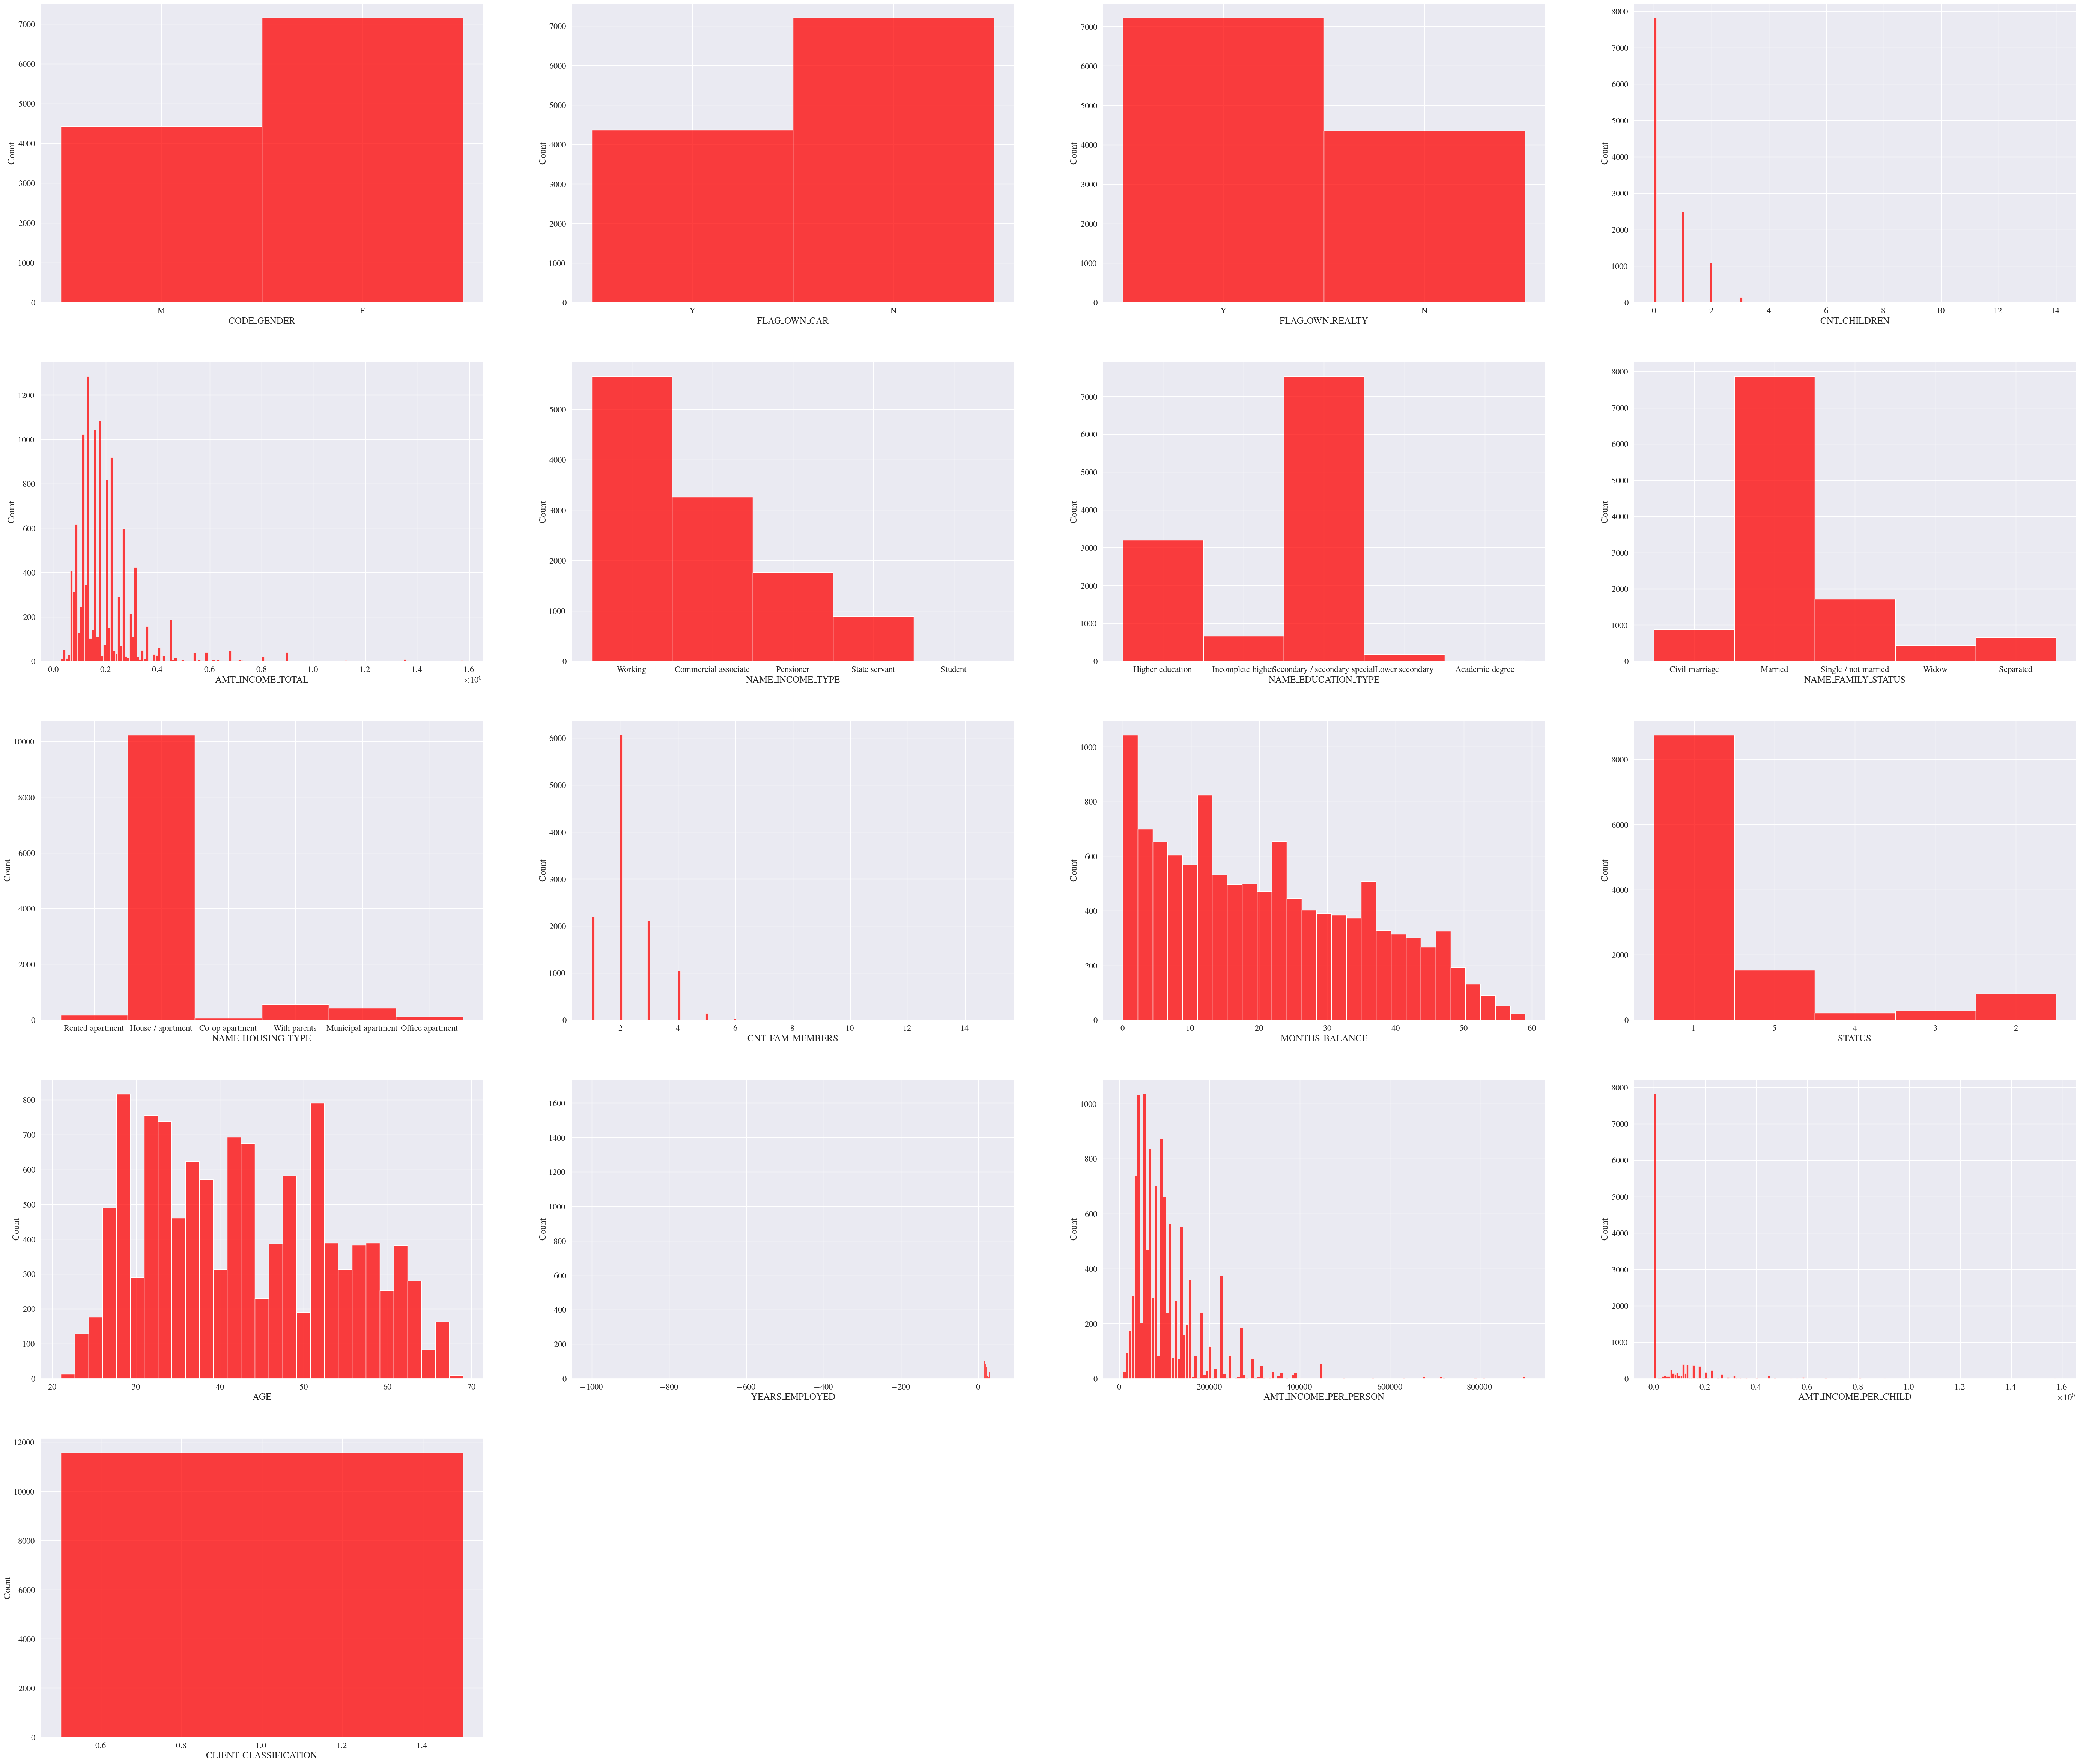

In [43]:
plt.figure(figsize = (70,60))

for n, col in enumerate(df_clean.columns.values):
    plt.subplot(num_rows,num_cols, n+1)
    #sns.histplot(df_clean[col][good_clients], color='purple')
    sns.histplot(df_clean[col][bad_clients], color='red')
    #plt.title(col)

plt.show()

* Same thing only with good clients

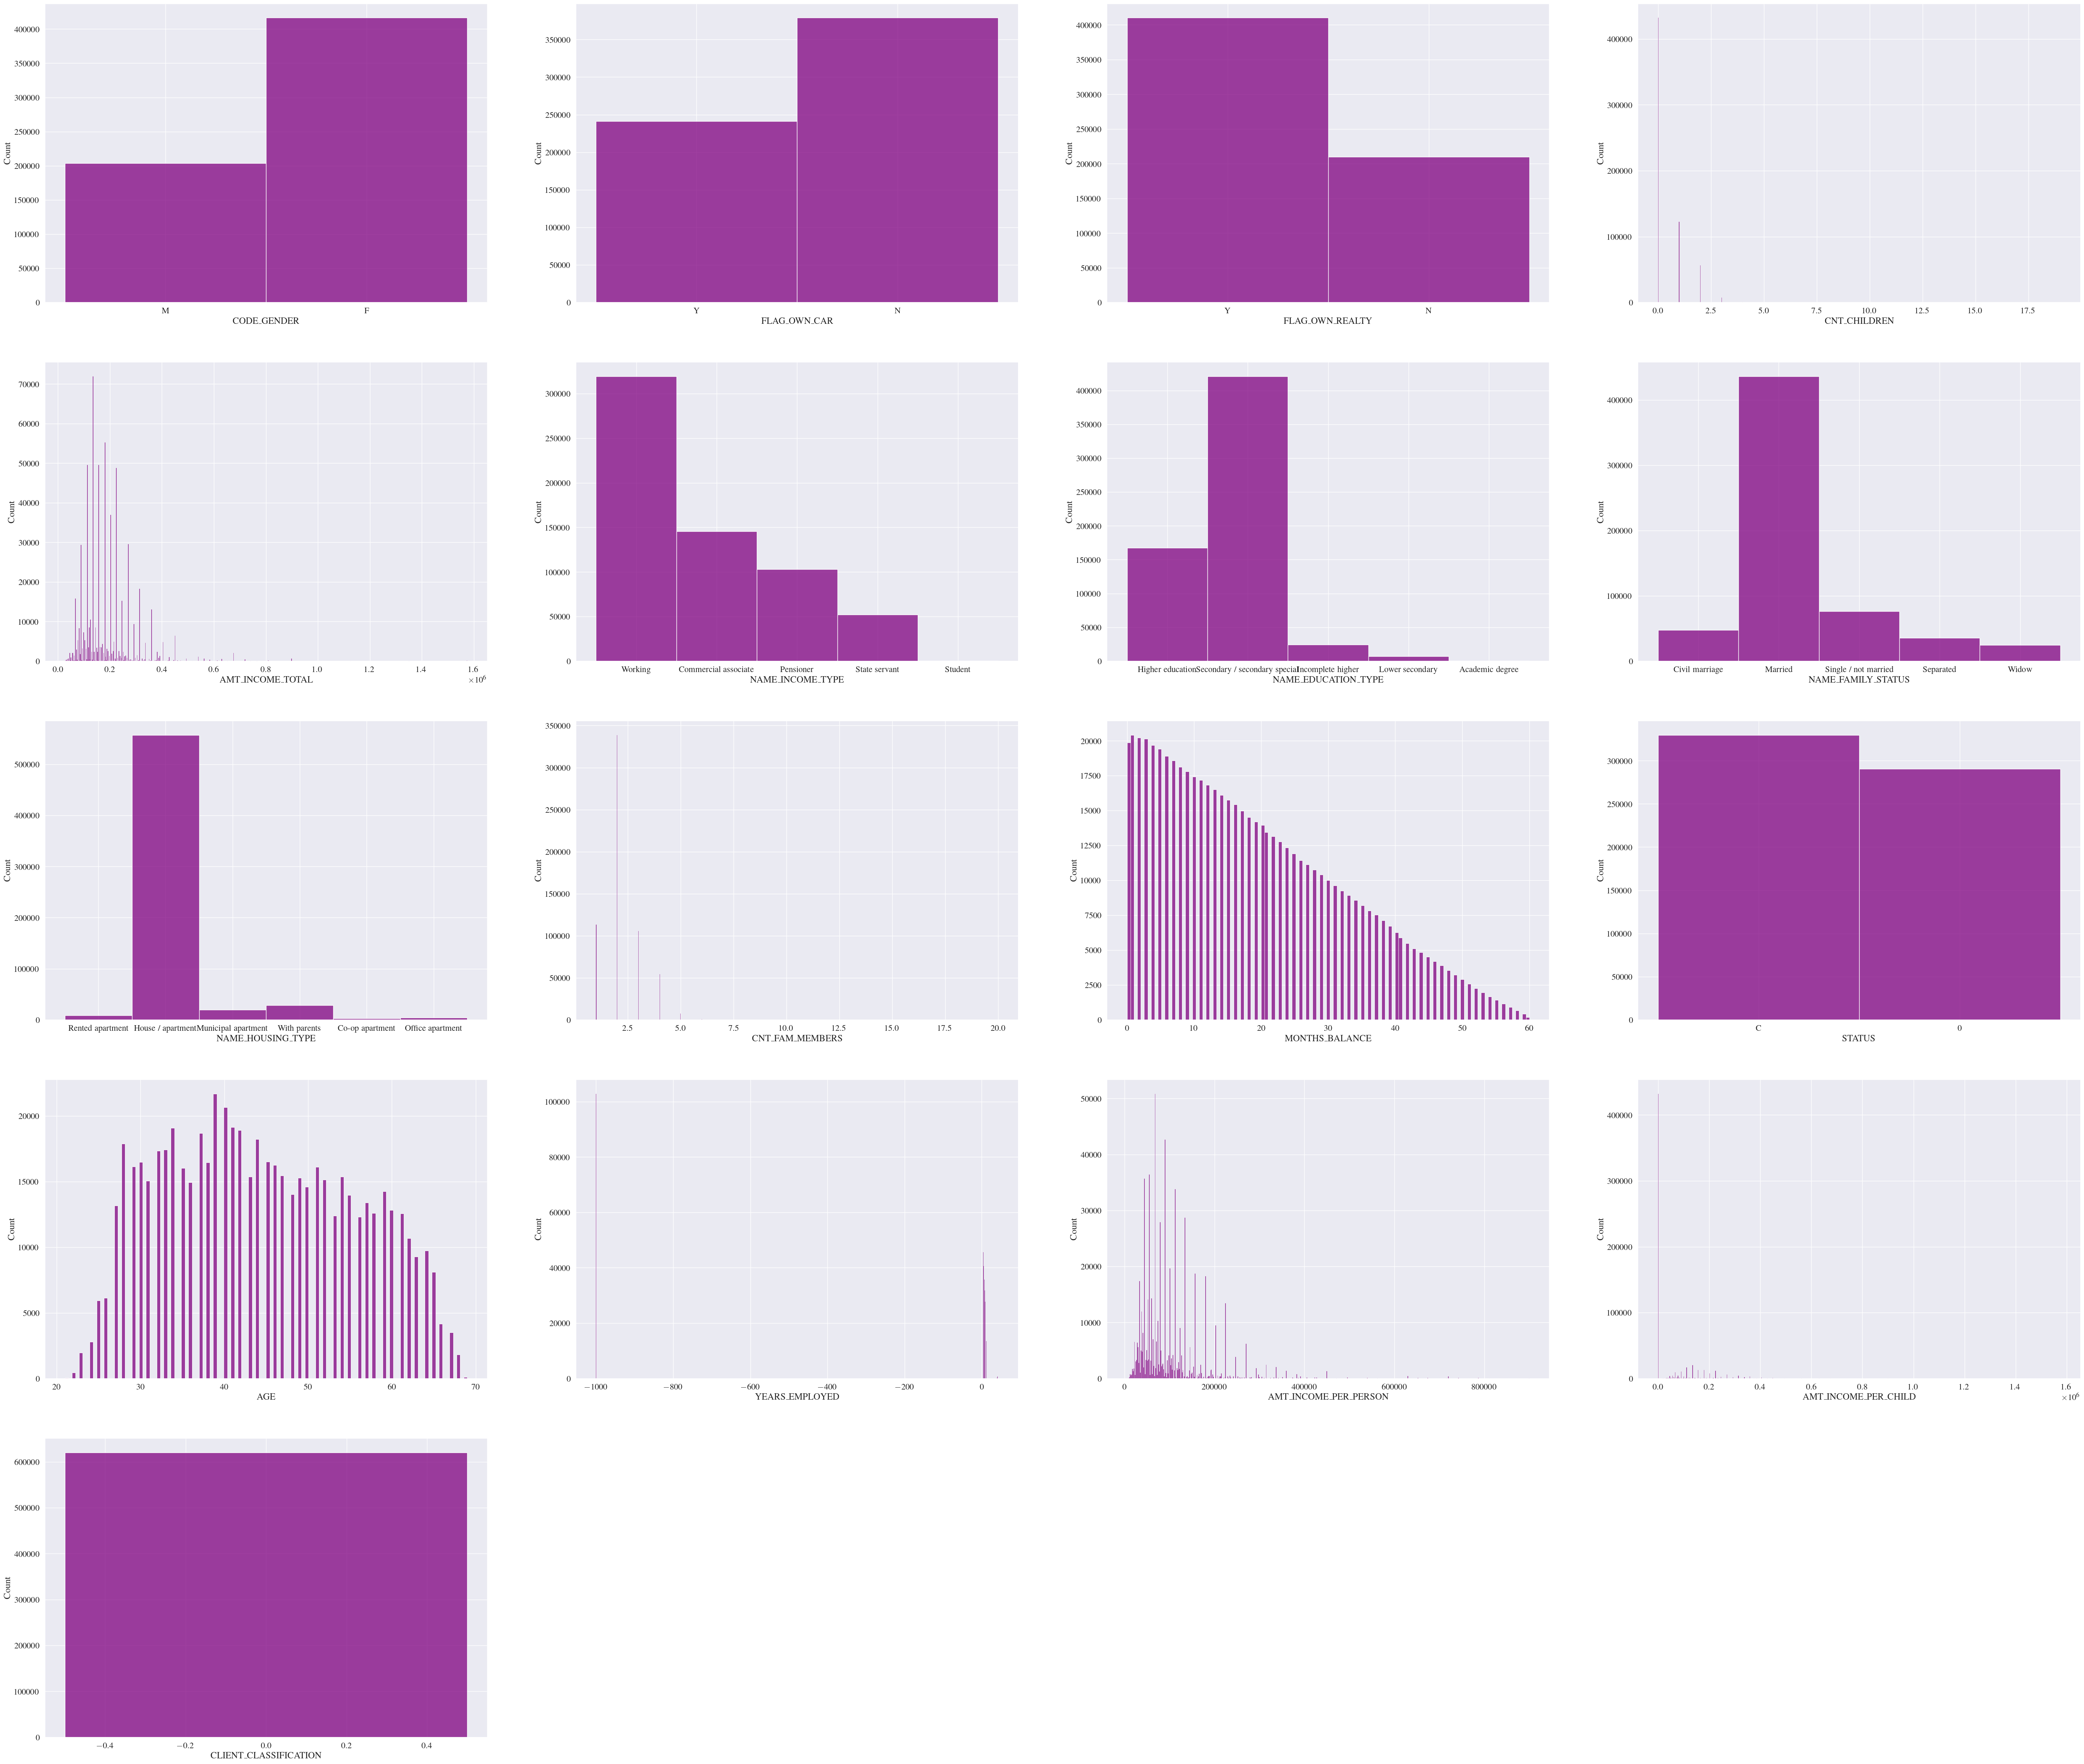

In [44]:
plt.figure(figsize = (70,60))

for n, col in enumerate(df_clean.columns.values):
    plt.subplot(num_rows,num_cols, n+1)
    sns.histplot(df_clean[col][good_clients], color='purple')
    #sns.histplot(df_clean[col][bad_clients], color='red')
    #plt.title(col)

plt.show()

In [45]:
# Describe the scaled_amount statistics of the good clients
df_clean[df_clean.CLIENT_CLASSIFICATION == 0].AMT_INCOME_PER_PERSON.describe()

count    620190.000000
mean      99934.866992
std       71676.953100
min        5625.000000
25%       56250.000000
50%       78750.000000
75%      123750.000000
max      900000.000000
Name: AMT_INCOME_PER_PERSON, dtype: float64

In [46]:
# Describe the scaled_amount statistics of the bad clients
df_clean[df_clean.CLIENT_CLASSIFICATION == 1].AMT_INCOME_PER_PERSON.describe()

count     11575.000000
mean     103015.693952
std       78927.079412
min        7560.000000
25%       54000.000000
50%       81000.000000
75%      126000.000000
max      900000.000000
Name: AMT_INCOME_PER_PERSON, dtype: float64

### 6) Ethical concern: removing the gender

* By performing this pre-analysis it is clear that most of the dataset is composed by women, I do not want to train **sexist models**, i.e., a model that takes into account the gender of the client when classifiyng him/her as a good or bad payer.
* In the line below I drop the 'CODE_GENDER' from my dataset, this provides me the dataset that I'll use to train my models in the core part of this project.

In [47]:
df_clean = df_clean.drop('CODE_GENDER', axis = 1)
df_indeterminate = df_indeterminate.drop('CODE_GENDER', axis = 1)

In [48]:
df_clean.columns

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS',
       'AGE', 'YEARS_EMPLOYED', 'AMT_INCOME_PER_PERSON',
       'AMT_INCOME_PER_CHILD', 'CLIENT_CLASSIFICATION'],
      dtype='object')

In [49]:
df_indeterminate.columns

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS',
       'AGE', 'YEARS_EMPLOYED', 'AMT_INCOME_PER_PERSON',
       'AMT_INCOME_PER_CHILD', 'CLIENT_CLASSIFICATION'],
      dtype='object')

## III.Modeling and training

This is the core of this project. The steps are as indicated:
It is important to take into account that this dataset is highly unbalanced. I will not use any resempling technique. Undersampling makes us loose information, oversample can lead to high bias and SMOTE does not work well.  
1. I'll use the following models to this problem (using **pipelines**?):
    * Logistic regression
    * Random Forest
    * XGBoost
    * LightGBM
    * Support Vector Machines
    * KNeighbors 
2. Feature importance for each model.
    * SHAP values
2. Choose the best models via **Cross-validation**
    * ROC-AUC and $f_1$ score are going to be the classification parameters chosen. 
        * $f_1$ score is threshold dependent, this will be taken into consideration in the analysis.
    * Why? ROC-AUC is threshold independent, hence I want to be sure that my model is correctly classifying the point, and know how random (close to 0.5) it is. $f_1$ provides the average between precision and recall.
3. Performing **hyperparameter optimization** for the best models
    * I'll use 10-fold cross validation with a Bayesian approach (I like Bayes, Bayes is life)
4. Models performance evaluation (using test dataset)
    * Predictions in the test dataset
    * The veredict **confusion matrices**
    * Classification report for the chosen model
5. Summary and discussion
    * Chosen model and figures of merit
    
#### References
1. Treating unbalanced datasets (in portuguese): https://medium.com/datalab-log/voc%C3%AA-deve-calibrar-seu-modelo-desbalanceado-ou-n%C3%A3o-3f111160653a
2. XGBoost tutorial: https://www.datacamp.com/tutorial/xgboost-in-python
3. SVM tutorial: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
4. KNeighbors tutorial: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
5. LighGBM documentation: https://lightgbm.readthedocs.io/en/stable/

### 1) Model training

In [59]:
# To train the models
from sklearn.model_selection import train_test_split # To set a training and test sets

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb 
from sklearn.neighbors import KNeighborsClassifier
#import lightgbm as lgb

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, auc, precision_recall_curve, RocCurveDisplay

def metric_printer(y_prediction_proba, thr = 0.5):
    
    pred = (y_prediction_proba[:,1] > thr).astype(int)
    
    cf = pd.DataFrame(confusion_matrix(y_test,pred))
    
    print('Precision:', round(precision_score(y_test, pred),2))
    print('Recall:', round(recall_score(y_test, pred),2))
    print('f1 score:', round(f1_score(y_test, pred),2))
    print('ROC-AUC:', round(roc_auc_score(y_test, y_prediction_proba[:,1]),2))
    print('Confunsion matrix:')
    print(cf)
    
    return None

### 2) Feature importance

### 3) Cross-validation

### 4) Hyperparameter optimization

### 5) Chosen model evaluation

### 6) Summary & conclusions

## IV.Counterfactual evaluation and Reject inference - To discuss with Carlo

Based on the strategy discussed inb this lecture https://www.youtube.com/watch?v=CJeMJfUYwkM&ab_channel=BuildingNubank (in portuguese).

* We have a rule $\cal{M}$ that approves or not the credit for a client.
* People who are rejected are a **hidden target**, because since we are not providing credit we do not have information about then. 
    * In our dataset they are represented by people with no loan, "X" or -1 in our encoding.
    * The idea here is simple "We have to bet to gain information". We'll only know if someone is a good client if we actually provide credit to this person, otherwise we'll never know.

**Counterfactual problem:** Let's assume we change the rule $\cal{M}$ by $\cal{M}^{\prime}$ and we **randomly** select people that the rule $\cal{M}$ has rejected and approve their credit line.
* In this case, some of them might turn out to be actually good clients and other were really bad clients. By doing so we obtain information about the rejected people. 
* The important thing to take into account here is **what is the cost of the true negatives?** 
    * We use the confusion matrix to infer it.

## V.Discussion and conclusions

## System information

In [50]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.11.3 (main, Apr 19 2023, 18:51:09) [Clang 14.0.6 ]
executable: /Users/brunogoes/anaconda3/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 67.8.0
        numpy: 1.24.3
        scipy: 1.11.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/brunogoes/anaconda3/lib/libopenblasp-r0.3.21.dylib
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.21
    num_threads: 8
threading_layer: pthreads
   architecture: Haswell

       filepath: /Users/brunogoes/anaconda3/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 16
None
